# load library

In [17]:
!pip install -U textblob


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [33]:
from textblob import TextBlob
from nltk import sent_tokenize
from transformers import AutoTokenizer
from tqdm import tqdm

# Load data

In [46]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/160k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,jaegarbong,"I have a feeling what you are asking for, but ...",2024-09-19 16:55:00,lnx7tpj,1fkpdzj,datascience,t5_2sptq
1,HammerPrice229,Have to agree (as someone trying to break in)....,2024-09-19 18:10:18,lnxmb0z,1fkpdzj,datascience,t5_2sptq
2,meloncholy,The PyData conferences usually have some good ...,2024-09-19 18:46:42,lnxt8w0,1fkpdzj,datascience,t5_2sptq
3,LyleLanleysMonorail,Coursera used to have a Practical Data Science...,2024-09-19 17:16:03,lnxbvt9,1fkpdzj,datascience,t5_2sptq
4,butyrospermumparkii,"On that note, [Spotify's engineering blog ](ht...",2024-09-19 18:13:40,lnxmy1o,1fkpdzj,datascience,t5_2sptq


In [47]:
df['body'] = df['body'].fillna("")  # Replace NaN with empty strings

# Get Sentiment on sentence level

In [20]:
def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).polarity
    else:
        return 0

In [48]:
def get_sentiment_label(polarity):
    """Assign sentiment label based on polarity score."""
    if polarity > 0:
        return 'pos'
    elif polarity < 0:
        return 'neg'
    else:
        return 'neu'

In [50]:
# List to store the results
results = []

def truncate_to_max_length(text, max_length=512):
    # Check if the input is a string
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string inputs

    # Use TextBlob to split the text into words (equivalent to "tokens" here)
    blob = TextBlob(text)
    
    # Split the text into words (treat words as tokens)
    words = blob.words
    
    # Truncate the words to the max_length (512 "tokens")
    truncated_words = words[:max_length]
    
    # Join the truncated words back into a string
    truncated_text = ' '.join(truncated_words)
    
    return truncated_text

# Iterate through the dataframe
for index, row in tqdm(df.iterrows(), total=len(df), ncols=100):
    review = row['body']
    subreddit = row['subreddit']
    created_utc = row['created_utc']

    # Sentence tokenization
    for sentence in sent_tokenize(review):
        truncated_sentence = truncate_to_max_length(sentence, max_length=512)

        # Get sentiment for the sentence using TextBlob
        blob = TextBlob(truncated_sentence)
        sentiment_scores = blob.polarity  # Sentiment polarity score (-1 to 1)
        sentiment_label = get_sentiment_label(sentiment_scores)
        # Append results
        results.append({
            "subreddit": subreddit,
            "created_utc": created_utc,
            "sentence": truncated_sentence,
            "sentiment_scores": sentiment_scores,
            "polarity": sentiment_label
        })

100%|█████████████████████████████████████████████████████| 161552/161552 [01:02<00:00, 2599.52it/s]


# Export and visualize results

In [51]:
df_results = pd.DataFrame(results)
df_results.to_csv('/Users/suqiulin/Downloads/sentiment_by_textblob.csv', index=False)

In [52]:
df_results.head()

,subreddit,created_utc,sentence,sentiment_scores,polarity
0,datascience,2024-09-19 16:55:00,I have a feeling what you are asking for but s...,-0.0500,neg
1,datascience,2024-09-19 16:55:00,however Try blogs of major companies,0.0625,pos
2,datascience,2024-09-19 16:55:00,I used to read Netflix Engineering blog where ...,0.0000,neu
3,datascience,2024-09-19 16:55:00,Being a gamer I also read Ubi Riot and Activis...,0.0000,neu
4,datascience,2024-09-19 16:55:00,And how is not finding insight a part of data ...,0.0000,neu


In [54]:
# output count
df_results.shape

(438484, 5)

In [55]:
df_results['polarity'].value_counts()

polarity
neu    192521
pos    163737
neg     82226
Name: count, dtype: int64

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


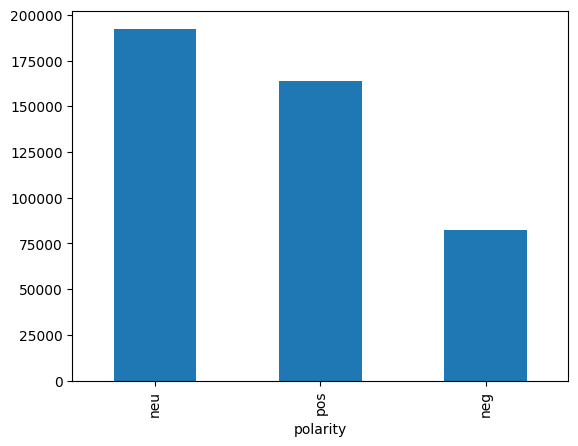

In [56]:
!pip install matplotlib
import matplotlib.pyplot as plt
df_results['polarity'].value_counts().plot(kind='bar')
plt.show()

# Evaluation

In [57]:
file_path = '/Users/suqiulin/Downloads/labelled_dataset_gpt4o.csv'
df1=pd.read_csv(file_path)
df1.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id,label
0,nodesign89,So nothing new?,9/8/2024 18:09,lm5go3e,1fc2c3m,technology,t5_2qh16,NEUTRAL
1,rangeo,Wayback I used to enjoy the random click to so...,9/19/2024 16:23,lnx1rfk,1fkg9y6,technology,t5_2qh16,NEUTRAL
2,OMG__Ponies,"Has it? IDK. If so, they may be out of jobs as...",9/18/2024 0:54,lnnw1fj,1fjc1an,technology,t5_2qh16,NEGATIVE
3,QueenOfQuok,I want to write a book *specifically so it can...,9/6/2024 11:17,lls097x,1f9vq81,technology,t5_2qh16,POSITIVE
4,valacious,"I hear you, and totally agree, I don’t own a t...",9/6/2024 3:48,llqrf4x,1f9n7pc,cybersecurity,t5_2u559,NEUTRAL


In [58]:
df1.shape

(10000, 8)

In [ ]:
# to be updated
eval = []
for index, row in tqdm(df1.iterrows(), total=len(df1), ncols=100):
    review = row['body']
    label = row['label']
    subreddit = row['subreddit']
    created_utc = row['created_utc']

    # Sentence tokenization
    for sentence in sent_tokenize(review):
        truncated_sentence = truncate_to_max_length(sentence, max_length=512)

        # Get sentiment for the sentence using TextBlob
        blob = TextBlob(truncated_sentence)
        sentiment_scores = blob.polarity  # Sentiment polarity score (-1 to 1)
        sentiment_label = get_sentiment_label(sentiment_scores)
        # Append results
        eval.append({
            "subreddit": subreddit,
            "created_utc": created_utc,
            "sentence": truncated_sentence,
            "sentiment_scores": sentiment_scores,
            "predicted_polarity": sentiment_label,
            'labeled_polarity':label
        })

In [ ]:
# to compare sentence level sentiment on the gpt labelled dataset
df_eval = pd.DataFrame(eval)

In [9]:
!pip install seaborn
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [15]:
y_true = df_eval['labeled_polarity']
y_pred = df_eval['predicted_polarity']
cm = confusion_matrix(y_true, y_pred, labels=['pos', 'neg', 'neu'])

# Compute accuracy
true_positives = cm.diagonal()
total_actual = cm.sum(axis=1)

# Calculate per-class accuracy
accuracy_per_class = true_positives / total_actual
accuracy_pos, accuracy_neg, accuracy_neu = accuracy_per_class


# Compute recall (per class average)
recall = recall_score(y_true, y_pred, average=None, labels=['pos', 'neg', 'neu'])

# Compute F1 Score
f1_scores = f1_score(y_true, y_pred, labels=['pos', 'neg', 'neu'], average=None)
f1_pos, f1_neg, f1_neu = f1_scores

# Type 1 Error (False Positive Rate) - per class
type_1_error = 1 - recall  # Since FPR = 1 - recall (when averaged across classes)

# Compute Type 2 Error (False Negative Rate)
# Type 2 error (FNR) is simply: 1 - recall per class
type_2_error = 1 - recall

# Output the results
print(f"Confusion Matrix:\n{cm}")
print(f"Recall (per class): {recall}")
print(f"Type 1 Error (per class): {type_1_error}")
print(f"Type 2 Error (per class): {type_2_error}")

# Print accuracy for each class
print(f"Accuracy for 'pos': {accuracy_pos}")
print(f"Accuracy for 'neg': {accuracy_neg}")
print(f"Accuracy for 'neu': {accuracy_neu}")

# Print F1 scores for each class
print(f"F1 Score for 'pos': {f1_pos}")
print(f"F1 Score for 'neg': {f1_neg}")
print(f"F1 Score for 'neu': {f1_neu}")


Confusion Matrix:
[[15827     3     0]
 [    0  8277     0]
 [    0     0 13142]]
Recall (per class): [0.99981049 1.         1.        ]
Type 1 Error (per class): [0.00018951 0.         0.        ]
Type 2 Error (per class): [0.00018951 0.         0.        ]
Accuracy for 'pos': 0.9998104864181933
Accuracy for 'neg': 1.0
Accuracy for 'neu': 1.0
F1 Score for 'pos': 0.9999052342293964
F1 Score for 'neg': 0.9998188077550281
F1 Score for 'neu': 1.0


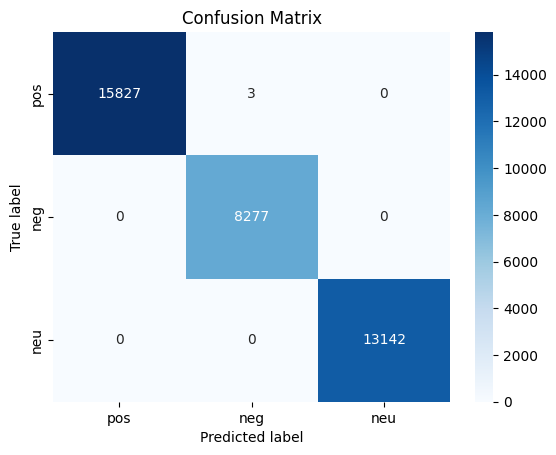

In [11]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['pos', 'neg', 'neu'], yticklabels=['pos', 'neg', 'neu'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()